In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fitbit_df = pd.read_csv('fitbit_data.csv')

In [3]:
fitbit_flushed_df = pd.read_csv('fitbit_eda_flushed_df.csv')
fitbit_mean_df = pd.read_csv('fitbit_eda_mean_df.csv')

In [4]:
fitbit_flushed_df.columns

Index(['Unnamed: 0', 'Id', 'ActivityDate', 'ActivityDay', 'TotalSteps',
       'TotalDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')

In [5]:
fitbit_flushed_df.drop("Unnamed: 0", axis=1, inplace=True)
fitbit_mean_df.drop("Unnamed: 0", axis=1, inplace=True)

# Step 1: First glance at dataframes:

In [6]:
fitbit_df.head()

,Id,ActivityDate,ActivityDay,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Unnamed: 16,Unnamed: 17
0,1503960366,4/12/2016,Tue,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,NaN,Tue
1,1503960366,4/13/2016,Wed,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,NaN,Wed
2,1503960366,4/14/2016,Thu,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,NaN,Thu
3,1503960366,4/15/2016,Fri,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,NaN,Fri
4,1503960366,4/16/2016,Sat,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,NaN,Sat


/Users/ashleybodine/anaconda3/envs/capstone/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Distribution of Step Count by day')

<Figure size 1200x1200 with 0 Axes>

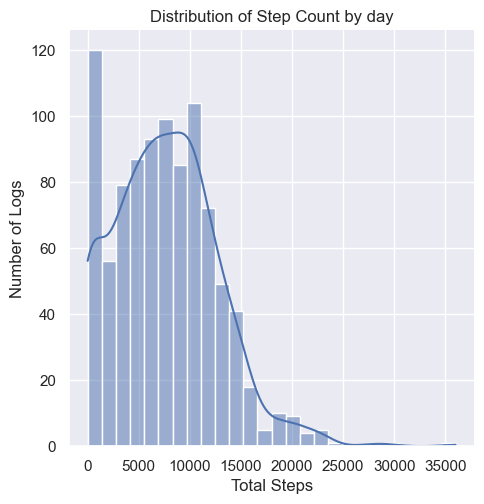

In [7]:
figure = plt.figure(figsize=(12,12))

ax = sns.displot(fitbit_df['TotalSteps'], kde=True)

plt.ylabel('Number of Logs')
plt.xlabel('Total Steps')
plt.title('Distribution of Step Count by day')

/Users/ashleybodine/anaconda3/envs/capstone/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Distribution of Total Distance by Day')

<Figure size 1200x1200 with 0 Axes>

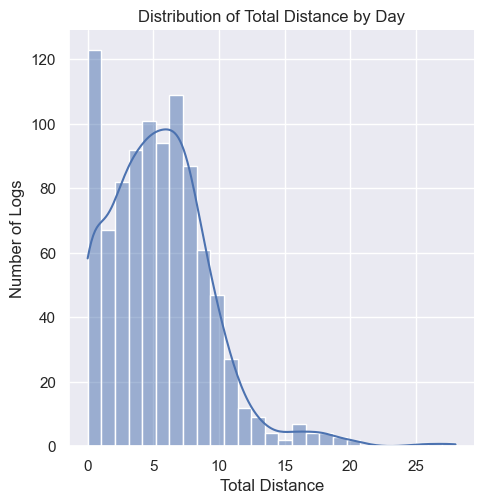

In [8]:
figure = plt.figure(figsize=(12,12))

ax = sns.displot(fitbit_df['TotalDistance'], kde=True)

plt.ylabel('Number of Logs')
plt.xlabel('Total Distance')
plt.title('Distribution of Total Distance by Day')

/Users/ashleybodine/anaconda3/envs/capstone/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Distribution of Calories by day')

<Figure size 1200x1200 with 0 Axes>

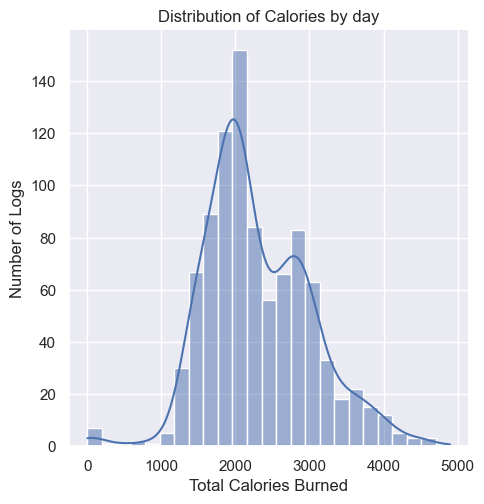

In [9]:
figure = plt.figure(figsize=(12,12))

ax = sns.displot(fitbit_df['Calories'], kde=True)

plt.ylabel('Number of Logs')
plt.xlabel('Total Calories Burned')
plt.title('Distribution of Calories by day')

# Findings:

### DataSet -> fitbit_df
    - Huge number of irregular step counts at or near 0... 
    - Several duplicate columns that aren't necessary for EDA and longterm goals
    - Several columns with uncessary data (activeminute distances etc.)


# Step 2: Cleansing for missing values:

### Adjustments:

#### DataSet -> fitbit_df
- Problem: Huge number of irregular step counts at or near 0... 
    1. Created new dataframe that inserted the mean for all columns (fitbit_mean_df)
    2. Created new dataframe that dropped all rows with irregular values (fitbit_flushed_df)
- Problem: Several duplicate columns that aren't necessary for EDA and longterm goals
    1. Removed TrackerDistance	LoggedActivitiesDistance and two unnamed columns
- Problem: Several columns with uncessary data (activeminute distances etc.)
    1. Removed LoggedActivitiesDistance	VeryActiveDistance	ModeratelyActiveDistance	LightActiveDistance	SedentaryActiveDistance columns as they have low correlations and do not provide any needed context to project
    

## Data Set Fitbit Steps with Means inserted for missing values (fitbit_mean_df):

In [10]:
fitbit_mean_df.head()

,Id,ActivityDate,ActivityDay,TotalSteps,TotalDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,Tue,13162.0,8.50,25.0,13.0,328.0,728.0,1985.0
1,1503960366,4/13/2016,Wed,10735.0,6.97,21.0,19.0,217.0,776.0,1797.0
2,1503960366,4/14/2016,Thu,10460.0,6.74,30.0,11.0,181.0,1218.0,1776.0
3,1503960366,4/15/2016,Fri,9762.0,6.28,29.0,34.0,209.0,726.0,1745.0
4,1503960366,4/16/2016,Sat,12669.0,8.16,36.0,10.0,221.0,773.0,1863.0


In [11]:
fitbit_mean_df.describe()

,Id,TotalSteps,TotalDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,8523.338480,6.126247,23.585511,15.121140,215.024941,948.636580,2379.742280
std,2.424805e+09,4374.391478,3.452121,32.050419,19.454369,87.590941,257.428495,659.292827
min,1.503960e+09,590.000000,0.420000,0.000000,0.000000,0.000000,13.000000,52.000000
25%,2.320127e+09,5388.500000,3.730000,0.000000,0.000000,157.750000,732.000000,1907.750000
50%,4.445115e+09,8523.338480,6.126247,13.000000,11.000000,215.024941,948.636580,2379.742280
75%,6.962181e+09,10727.000000,7.712500,32.000000,19.000000,264.000000,1161.750000,2793.250000
max,8.877689e+09,36019.000000,28.030001,210.000000,143.000000,518.000000,1440.000000,4900.000000


In [12]:
fitbit_mean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    940 non-null    int64  
 1   ActivityDate          940 non-null    object 
 2   ActivityDay           940 non-null    object 
 3   TotalSteps            940 non-null    float64
 4   TotalDistance         940 non-null    float64
 5   VeryActiveMinutes     940 non-null    float64
 6   FairlyActiveMinutes   940 non-null    float64
 7   LightlyActiveMinutes  940 non-null    float64
 8   SedentaryMinutes      940 non-null    float64
 9   Calories              940 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 73.6+ KB


## Data Set Fitbit Steps with Dropped rows for missing values (fitbit_flushed_df):

In [13]:
fitbit_flushed_df.head()

,Id,ActivityDate,ActivityDay,TotalSteps,TotalDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,Tue,13162,8.50,25,13,328,728,1985
1,1503960366,4/13/2016,Wed,10735,6.97,21,19,217,776,1797
2,1503960366,4/14/2016,Thu,10460,6.74,30,11,181,1218,1776
3,1503960366,4/15/2016,Fri,9762,6.28,29,34,209,726,1745
4,1503960366,4/16/2016,Sat,12669,8.16,36,10,221,773,1863


In [14]:
fitbit_flushed_df.describe()

,Id,TotalSteps,TotalDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,8.420000e+02,842.000000,842.000000,842.000000,842.000000,842.000000,842.00000,842.000000
mean,4.878428e+09,8523.338480,6.126247,23.585511,15.121140,215.024941,948.63658,2379.742280
std,2.413243e+09,4622.239505,3.647714,33.866359,20.556631,92.553744,272.01410,696.647606
min,1.503960e+09,590.000000,0.420000,0.000000,0.000000,0.000000,13.00000,52.000000
25%,2.320127e+09,5093.000000,3.510000,0.000000,0.000000,151.000000,720.00000,1876.500000
50%,4.558610e+09,8198.500000,5.715000,8.000000,8.000000,212.500000,1017.50000,2233.500000
75%,6.962181e+09,11167.750000,8.020000,36.000000,21.000000,273.750000,1182.00000,2846.000000
max,8.877689e+09,36019.000000,28.030001,210.000000,143.000000,518.000000,1440.00000,4900.000000


In [15]:
fitbit_flushed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    842 non-null    int64  
 1   ActivityDate          842 non-null    object 
 2   ActivityDay           842 non-null    object 
 3   TotalSteps            842 non-null    int64  
 4   TotalDistance         842 non-null    float64
 5   VeryActiveMinutes     842 non-null    int64  
 6   FairlyActiveMinutes   842 non-null    int64  
 7   LightlyActiveMinutes  842 non-null    int64  
 8   SedentaryMinutes      842 non-null    int64  
 9   Calories              842 non-null    int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 65.9+ KB


# Step 3:  Visualizations:

### Distributions of steps across participants (mean and flushed dfs):

/Users/ashleybodine/anaconda3/envs/capstone/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Distribution of Step Count by day (flushed data)')

<Figure size 1200x1200 with 0 Axes>

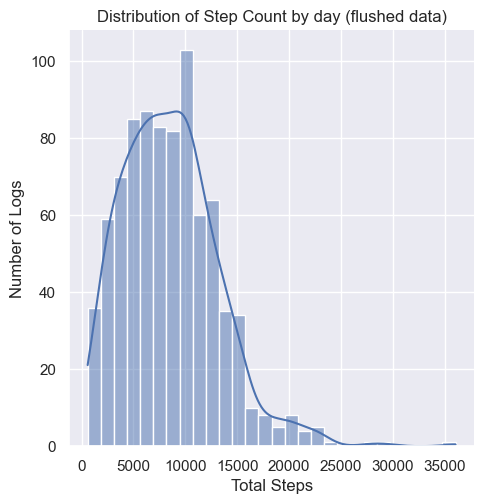

In [16]:
figure = plt.figure(figsize=(12,12))

ax = sns.displot(fitbit_flushed_df['TotalSteps'], kde=True)

plt.ylabel('Number of Logs')
plt.xlabel('Total Steps')
plt.title('Distribution of Step Count by day (flushed data)')

/Users/ashleybodine/anaconda3/envs/capstone/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Distribution of Step Count by day (mean data)')

<Figure size 1200x1200 with 0 Axes>

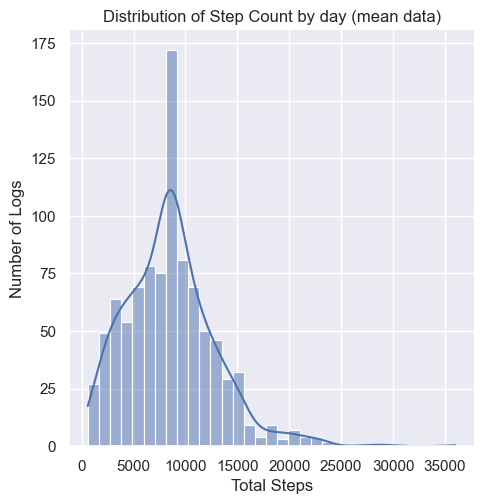

In [17]:
figure = plt.figure(figsize=(12,12))

ax = sns.displot(fitbit_mean_df['TotalSteps'], kde=True)

plt.ylabel('Number of Logs')
plt.xlabel('Total Steps')
plt.title('Distribution of Step Count by day (mean data)')

### Distributions of calories across participants (mean and flushed dfs):

/Users/ashleybodine/anaconda3/envs/capstone/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Distribution of Calories Burned by day (flushed data)')

<Figure size 1200x1200 with 0 Axes>

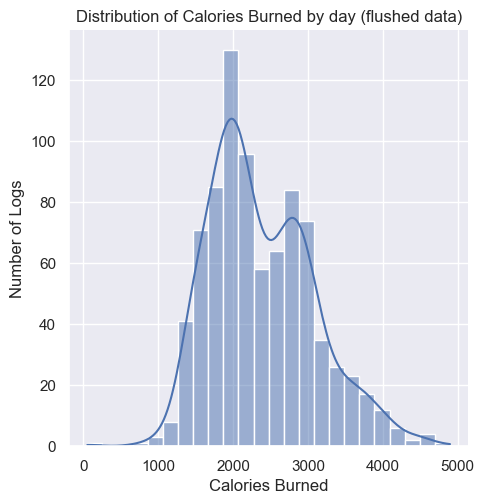

In [18]:
figure = plt.figure(figsize=(12,12))

ax = sns.displot(fitbit_flushed_df['Calories'], kde=True)

plt.ylabel('Number of Logs')
plt.xlabel('Calories Burned')
plt.title('Distribution of Calories Burned by day (flushed data)')

/Users/ashleybodine/anaconda3/envs/capstone/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Distribution of Calories Burned by day (mean data)')

<Figure size 1200x1200 with 0 Axes>

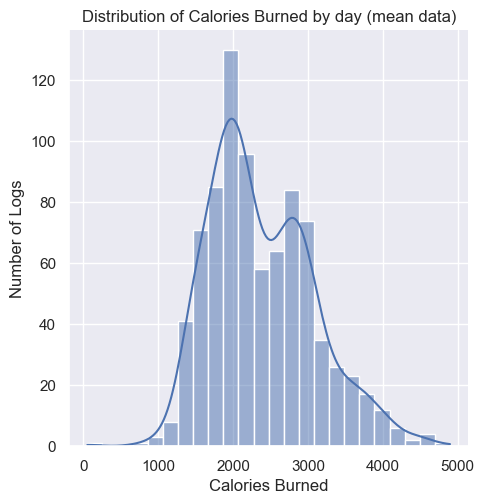

In [19]:
figure = plt.figure(figsize=(12,12))

ax = sns.displot(fitbit_flushed_df['Calories'], kde=True)

plt.ylabel('Number of Logs')
plt.xlabel('Calories Burned')
plt.title('Distribution of Calories Burned by day (mean data)')

### Distributions of total distance across participants (mean and flushed dfs):

/Users/ashleybodine/anaconda3/envs/capstone/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Distribution of total distance by day (flushed data)')

<Figure size 1200x1200 with 0 Axes>

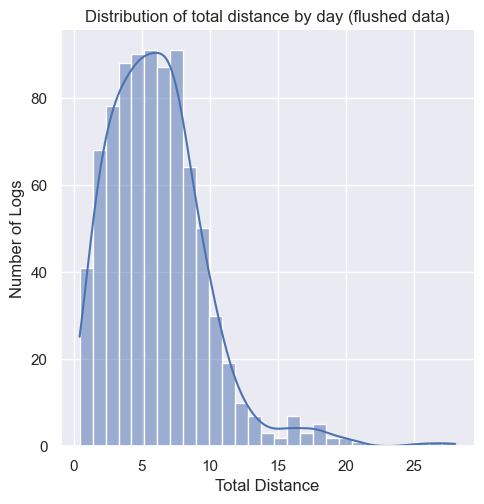

In [20]:
figure = plt.figure(figsize=(12,12))

ax = sns.displot(fitbit_flushed_df['TotalDistance'], kde=True)

plt.ylabel('Number of Logs')
plt.xlabel('Total Distance')
plt.title('Distribution of total distance by day (flushed data)')

/Users/ashleybodine/anaconda3/envs/capstone/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Distribution of total distance by day (mean data)')

<Figure size 1200x1200 with 0 Axes>

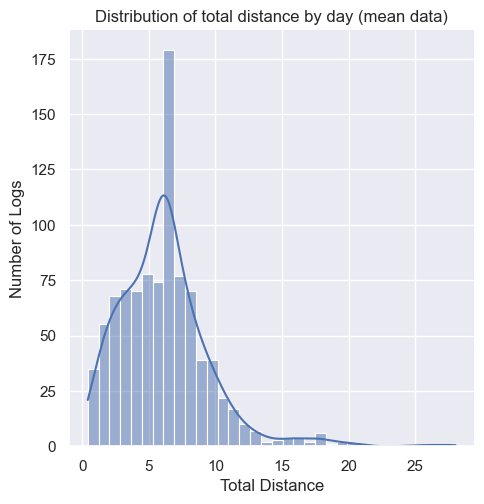

In [21]:
figure = plt.figure(figsize=(12,12))

ax = sns.displot(fitbit_mean_df['TotalDistance'], kde=True)

plt.ylabel('Number of Logs')
plt.xlabel('Total Distance')
plt.title('Distribution of total distance by day (mean data)')

### Group by user id to take a look at totals (see if there are any outliers and distributions amongst totals)

In [22]:
totals_by_id_df = fitbit_mean_df.groupby('Id')[["TotalSteps", "TotalDistance", "Calories", 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', "SedentaryMinutes"]].sum()

In [23]:
totals_by_id_df.head()

,TotalSteps,TotalDistance,Calories,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes
Id,,,,,,,
1503960366,384142.338480,248.226246,58688.742280,1223.585511,609.121140,7033.024941,25801.636580
1624580081,178061.000000,121.360001,45984.000000,269.000000,180.000000,4758.000000,38990.000000
1644430081,218489.000000,158.860001,84339.000000,287.000000,641.000000,5354.000000,34856.000000
1844505072,199055.738717,138.487458,63891.391924,334.197150,251.695962,6575.349169,31268.912114
1927972279,180919.092637,129.312446,73532.361045,465.539192,296.180523,4995.448931,33087.458432


/Users/ashleybodine/anaconda3/envs/capstone/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Distribution of total steps by Participant')

<Figure size 1200x1200 with 0 Axes>

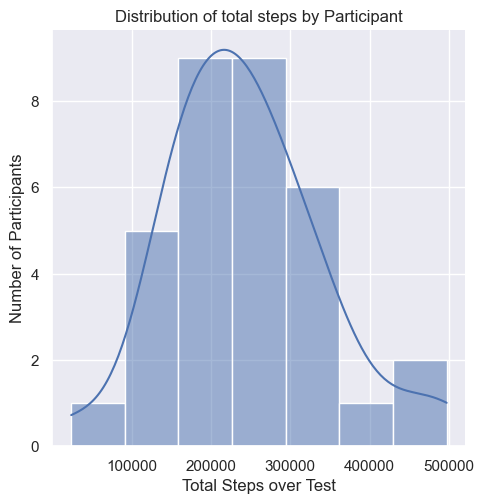

In [24]:
figure = plt.figure(figsize=(12,12))

ax = sns.displot(totals_by_id_df['TotalSteps'], kde=True)

plt.ylabel('Number of Participants')
plt.xlabel('Total Steps over Test')
plt.title('Distribution of total steps by Participant')

/Users/ashleybodine/anaconda3/envs/capstone/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Distribution of Calories Burned by Participant')

<Figure size 1200x1200 with 0 Axes>

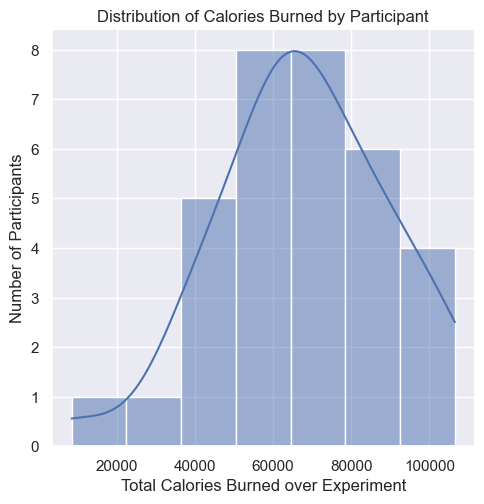

In [25]:
figure = plt.figure(figsize=(12,12))

ax = sns.displot(totals_by_id_df['Calories'], kde=True)

plt.ylabel('Number of Participants')
plt.xlabel('Total Calories Burned over Experiment')
plt.title('Distribution of Calories Burned by Participant')

/Users/ashleybodine/anaconda3/envs/capstone/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Distribution of Total Distance by Participant')

<Figure size 1200x1200 with 0 Axes>

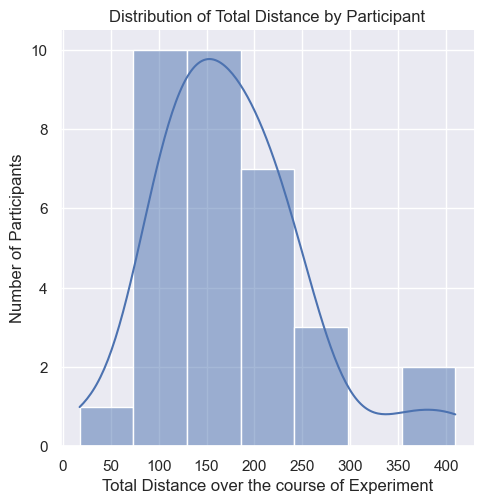

In [26]:
figure = plt.figure(figsize=(12,12))

ax = sns.displot(totals_by_id_df['TotalDistance'], kde=True)

plt.ylabel('Number of Participants')
plt.xlabel('Total Distance over the course of Experiment')
plt.title('Distribution of Total Distance by Participant')

/Users/ashleybodine/anaconda3/envs/capstone/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Distribution of Active Minutes by Participant')

<Figure size 1200x1200 with 0 Axes>

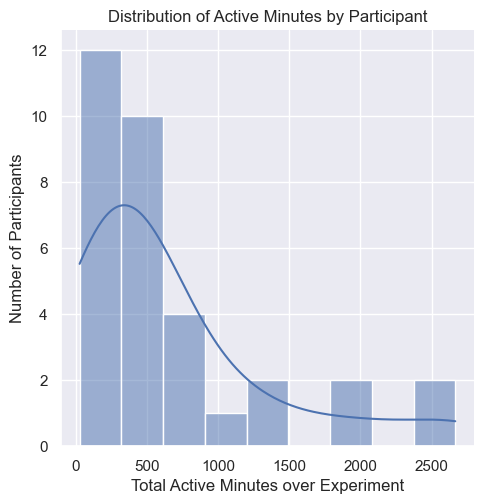

In [27]:
figure = plt.figure(figsize=(12,12))

ax = sns.displot(totals_by_id_df['VeryActiveMinutes'], kde=True)

plt.ylabel('Number of Participants')
plt.xlabel('Total Active Minutes over Experiment')
plt.title('Distribution of Active Minutes by Participant')

/Users/ashleybodine/anaconda3/envs/capstone/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Distribution of Fairly Active Minutes by Participant')

<Figure size 1200x1200 with 0 Axes>

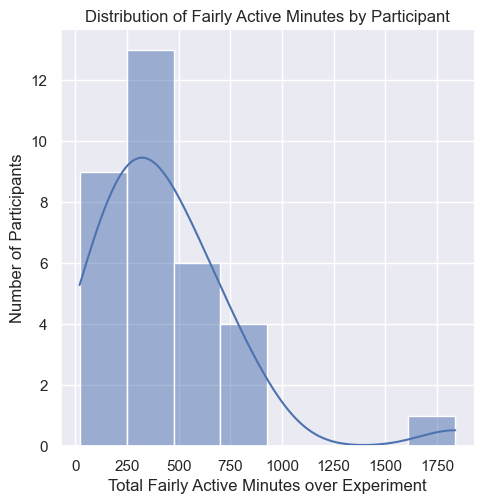

In [28]:
figure = plt.figure(figsize=(12,12))

ax = sns.displot(totals_by_id_df['FairlyActiveMinutes'], kde=True)

plt.ylabel('Number of Participants')
plt.xlabel('Total Fairly Active Minutes over Experiment')
plt.title('Distribution of Fairly Active Minutes by Participant')

/Users/ashleybodine/anaconda3/envs/capstone/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Distribution of Light Active Minutes by Participant')

<Figure size 1200x1200 with 0 Axes>

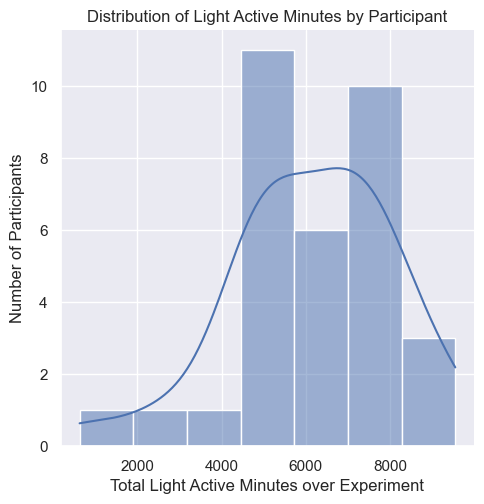

In [29]:
figure = plt.figure(figsize=(12,12))

ax = sns.displot(totals_by_id_df['LightlyActiveMinutes'], kde=True)

plt.ylabel('Number of Participants')
plt.xlabel('Total Light Active Minutes over Experiment')
plt.title('Distribution of Light Active Minutes by Participant')

/Users/ashleybodine/anaconda3/envs/capstone/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Distribution of Sedentary Minutes by Participant')

<Figure size 1200x1200 with 0 Axes>

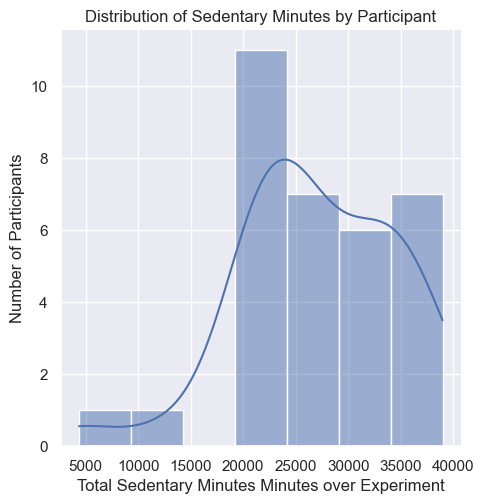

In [30]:
figure = plt.figure(figsize=(12,12))

ax = sns.displot(totals_by_id_df['SedentaryMinutes'], kde=True)

plt.ylabel('Number of Participants')
plt.xlabel('Total Sedentary Minutes Minutes over Experiment')
plt.title('Distribution of Sedentary Minutes by Participant')

In [31]:
totals_by_id_sorted = totals_by_id_df.sort_values(by='TotalSteps', ascending=True)

In [32]:
totals_by_id_sorted = totals_by_id_sorted.reset_index().rename(columns={'Id': 'Id_Label'})


In [33]:
totals_by_id_sorted.head()

,Id_Label,TotalSteps,TotalDistance,Calories,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes
0,4057192912,23875.33848,17.576247,8498.74228,26.585511,21.12114,627.024941,4377.63658
1,8253242879,131684.33848,94.806248,36351.74228,413.585511,287.12114,2436.024941,23968.63658
2,3372868164,137233.00000,94.140001,38662.00000,183.000000,82.00000,6558.000000,21551.00000
3,2320127002,146223.00000,98.819999,53449.00000,42.000000,80.00000,6144.000000,37823.00000
4,4445114986,148693.00000,100.620000,67772.00000,205.000000,54.00000,6482.000000,25727.00000


Text(0.5, 1.0, 'Total Steps of Participants in Experiment')

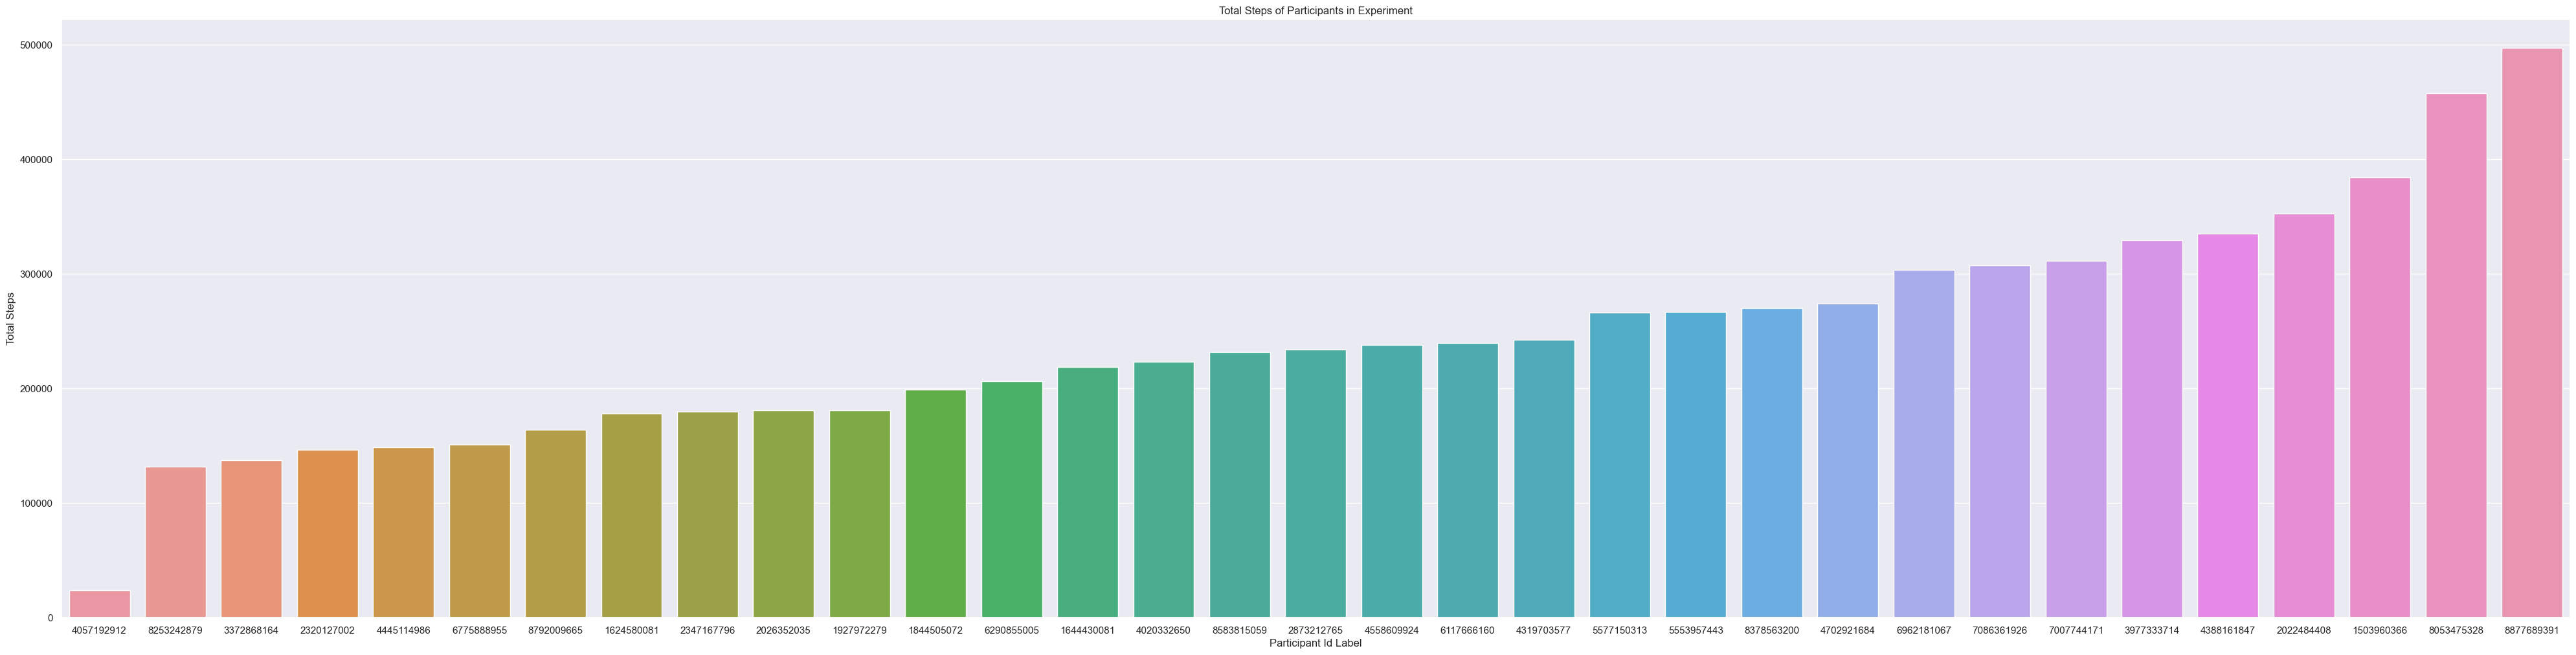

In [34]:
figure = plt.figure(figsize=(50,12))

ax = sns.barplot(data=totals_by_id_sorted, y='TotalSteps', x='Id_Label', order=totals_by_id_sorted['Id_Label'])

plt.ylabel('Total Steps')
plt.xlabel('Participant Id Label')
plt.title('Total Steps of Participants in Experiment')

### Strange outlier at 4057192912	-> only 4 entries (the remaining 32 have 936 entries)

In [35]:
fitbit_mean_df.Id.unique()

array([1503960366, 1624580081, 1644430081, 1844505072, 1927972279,
       2022484408, 2026352035, 2320127002, 2347167796, 2873212765,
       3372868164, 3977333714, 4020332650, 4057192912, 4319703577,
       4388161847, 4445114986, 4558609924, 4702921684, 5553957443,
       5577150313, 6117666160, 6290855005, 6775888955, 6962181067,
       7007744171, 7086361926, 8053475328, 8253242879, 8378563200,
       8583815059, 8792009665, 8877689391])

In [36]:
fitbit_mean_df.loc[fitbit_mean_df["Id"] == 4057192912]

,Id,ActivityDate,ActivityDay,TotalSteps,TotalDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
324,4057192912,4/12/2016,Tue,5394.00000,4.030000,0.000000,0.00000,164.000000,1276.00000,2286.00000
325,4057192912,4/13/2016,Wed,5974.00000,4.470000,0.000000,0.00000,160.000000,1280.00000,2306.00000
326,4057192912,4/15/2016,Fri,3984.00000,2.950000,3.000000,6.00000,88.000000,873.00000,1527.00000
895,4057192912,4/14/2016,Thu,8523.33848,6.126247,23.585511,15.12114,215.024941,948.63658,2379.74228


<Axes: xlabel='Id', ylabel='count'>

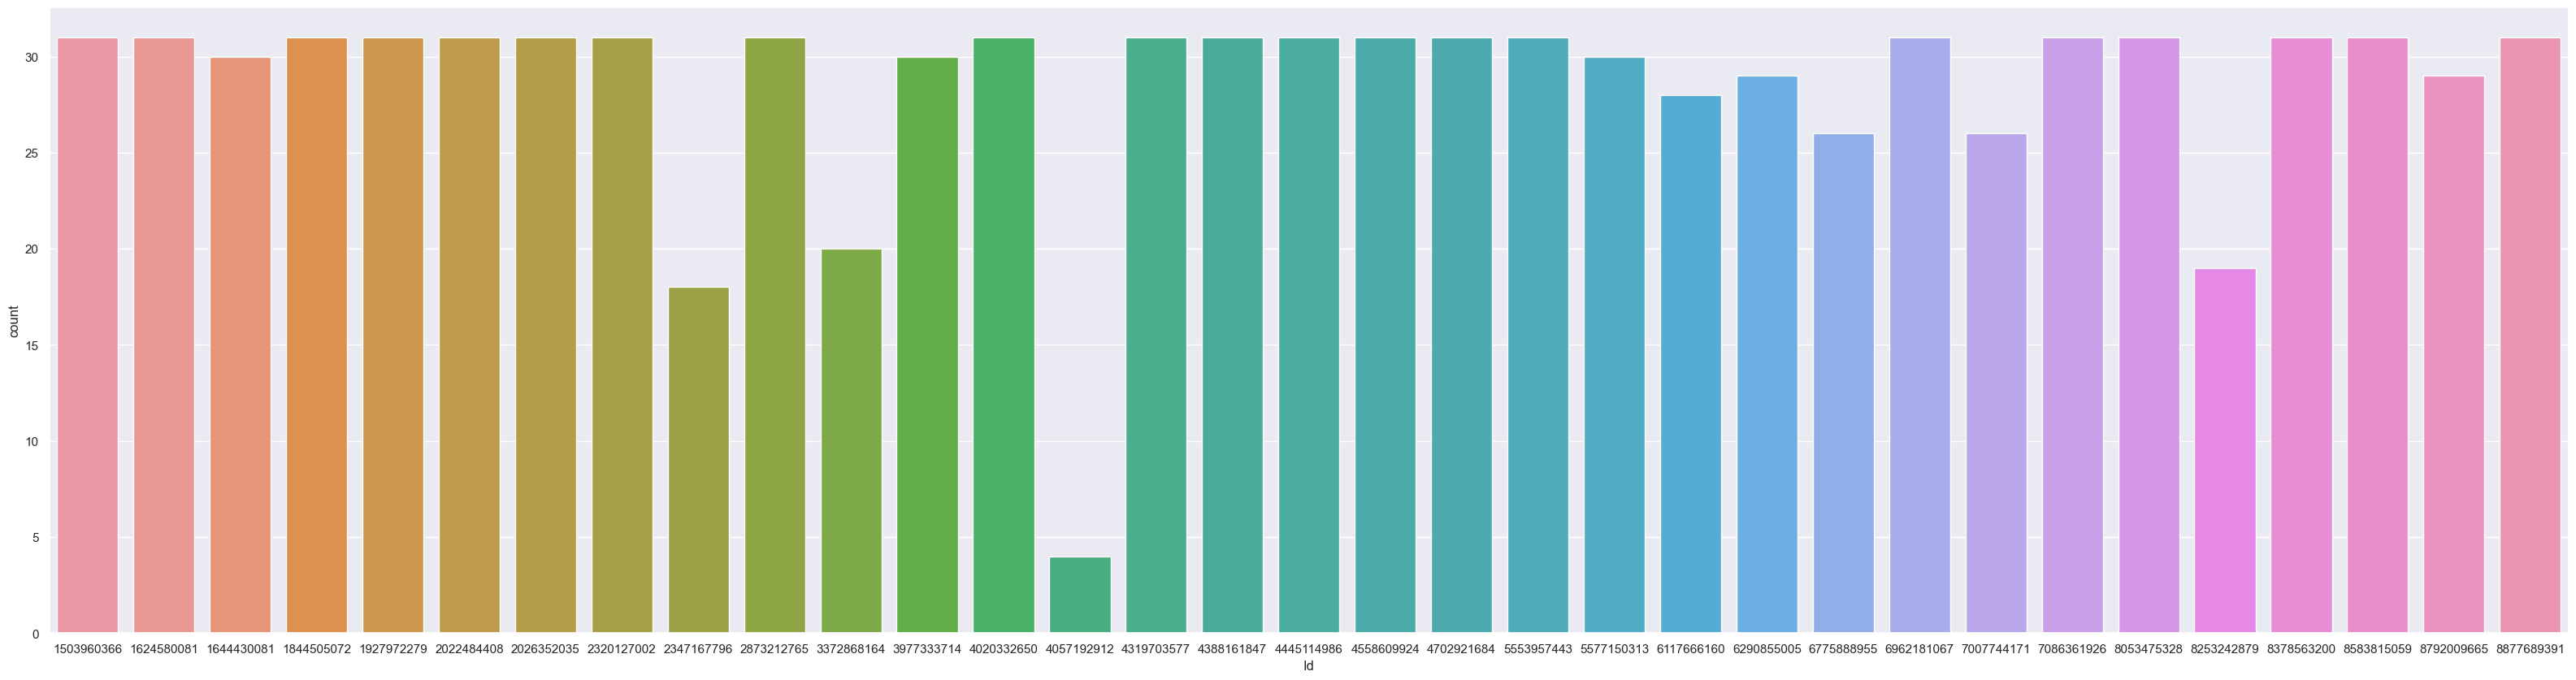

In [37]:
plt.figure(figsize=(40, 10))  # Adjust the figure size if needed
sns.countplot(data=fitbit_mean_df, x="Id")

### Not every participant has the same amount of entries... Max 32, Min 4

# Step 4: Correlations:

### Pair Plots for mean and flushed data: 

/Users/ashleybodine/anaconda3/envs/capstone/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

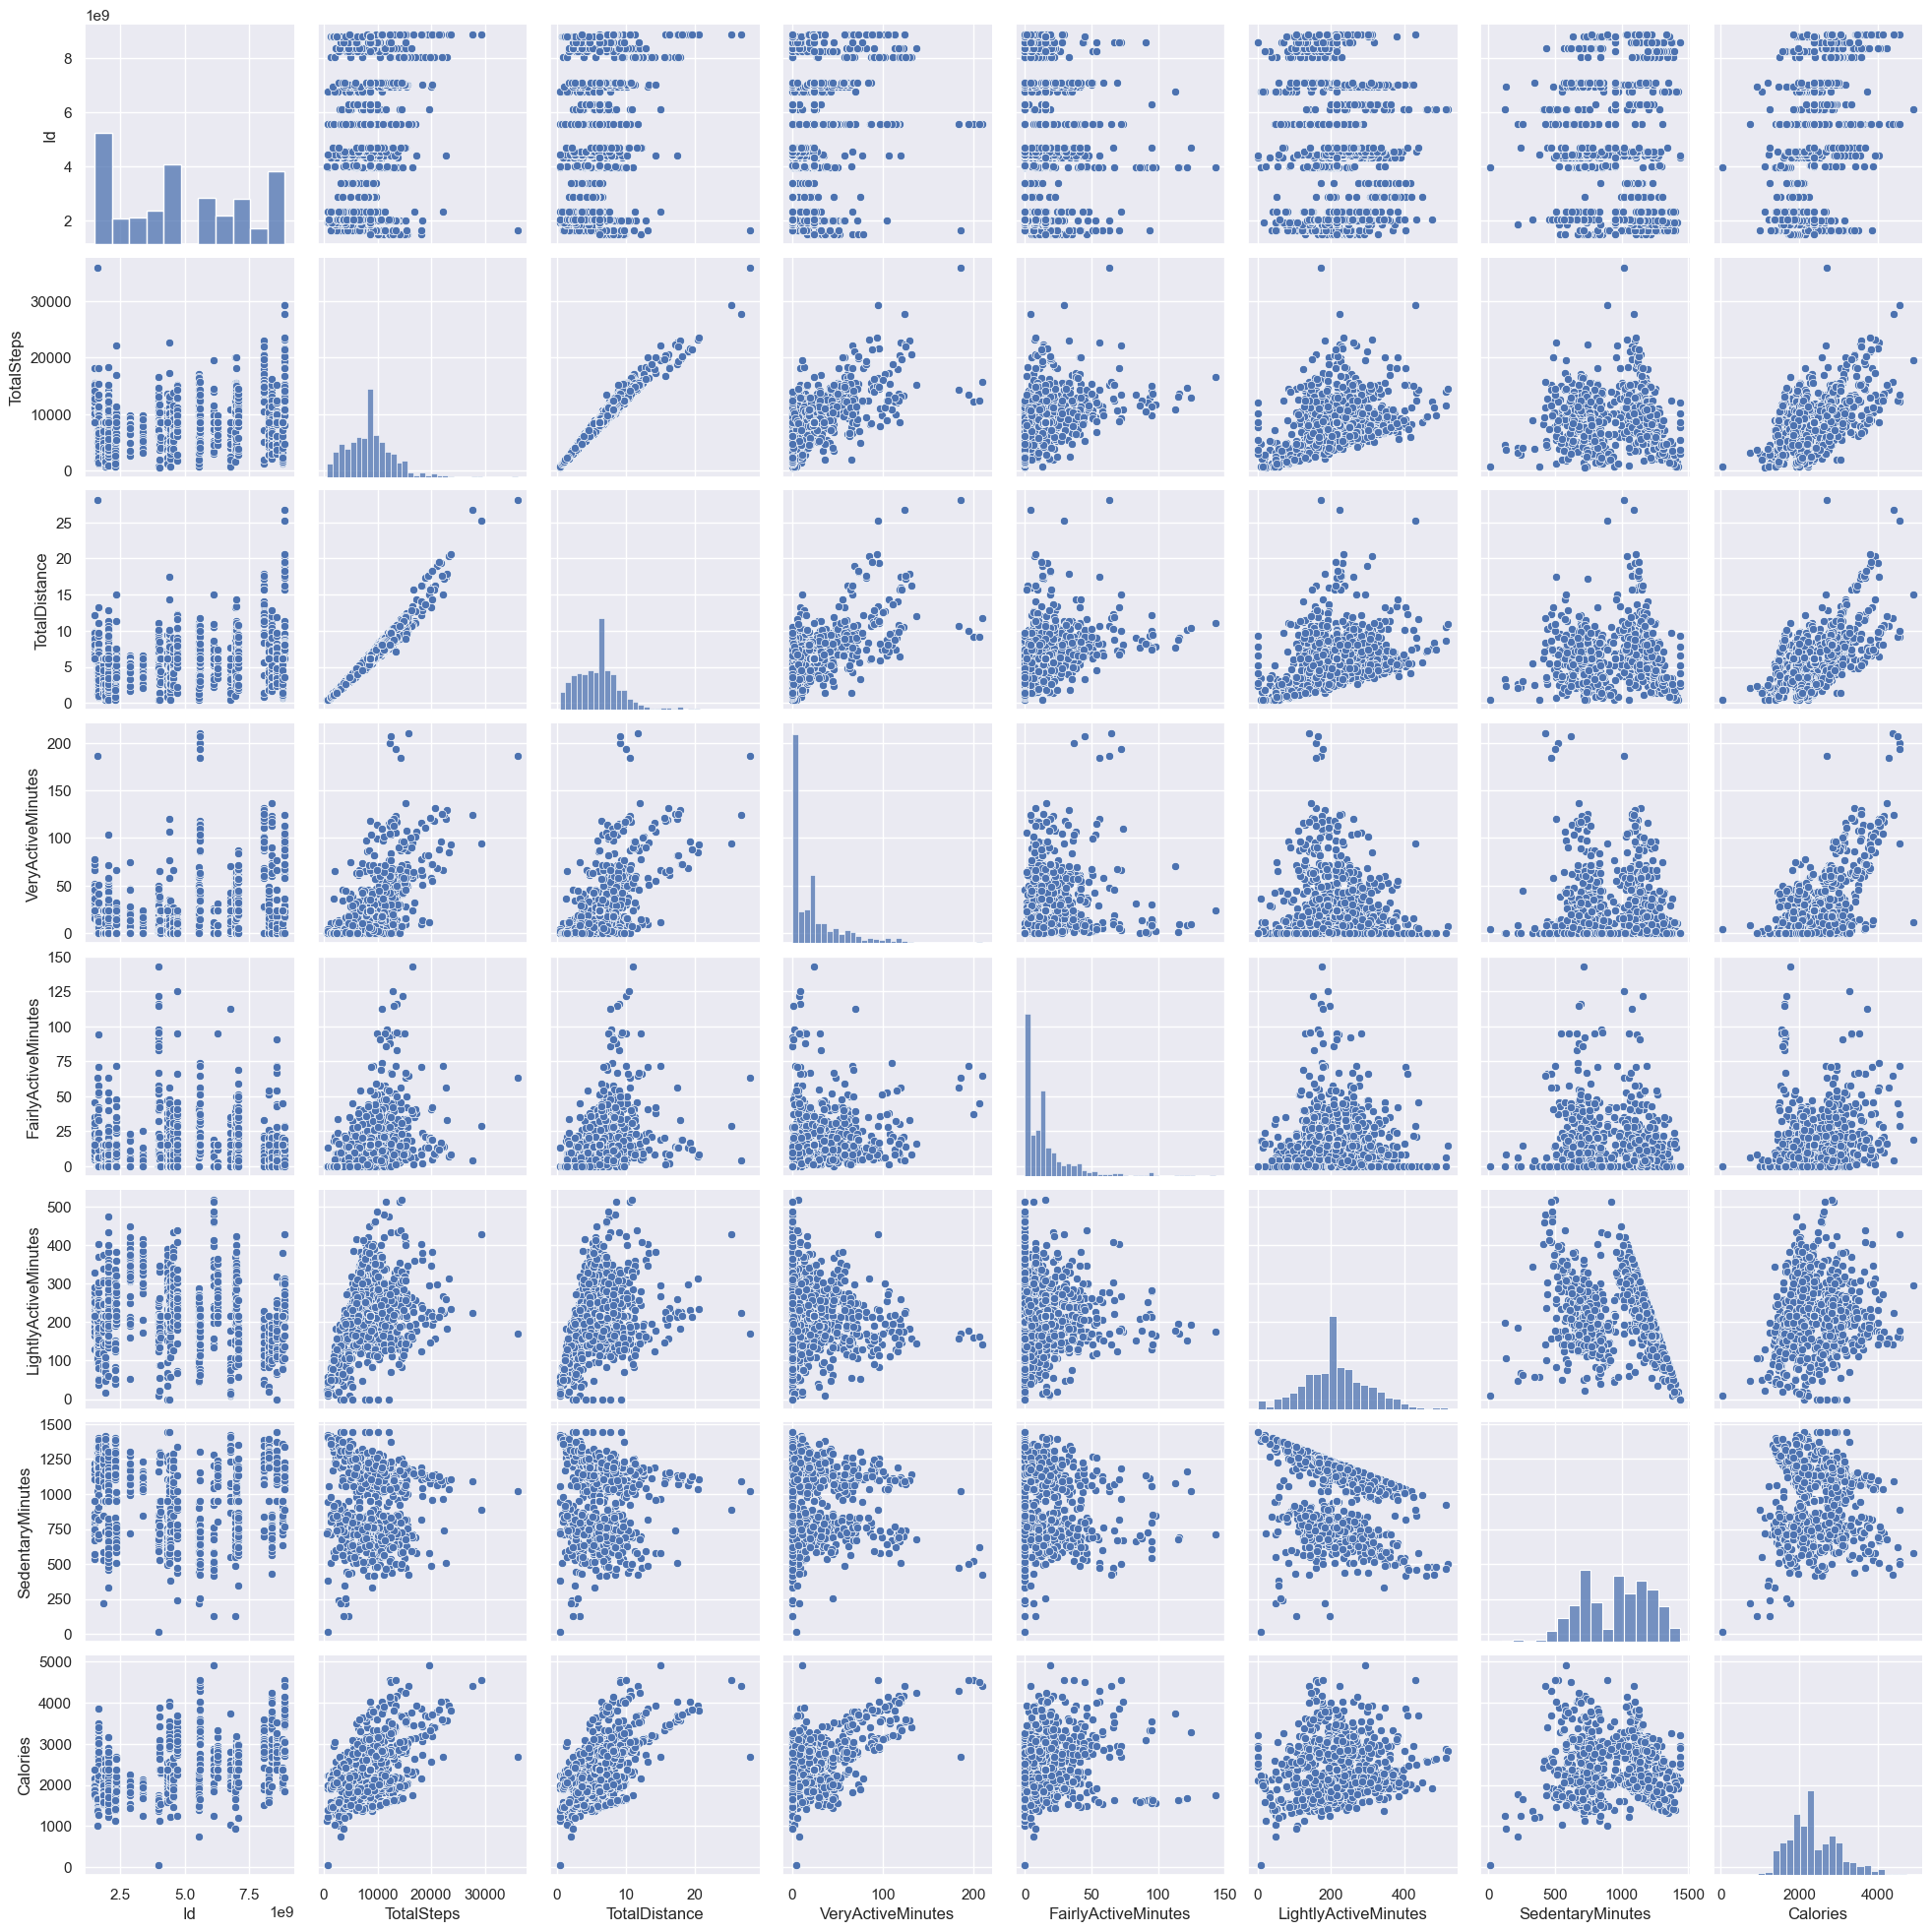

In [38]:
fig = plt.figure()

sns.pairplot(fitbit_mean_df)

/Users/ashleybodine/anaconda3/envs/capstone/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

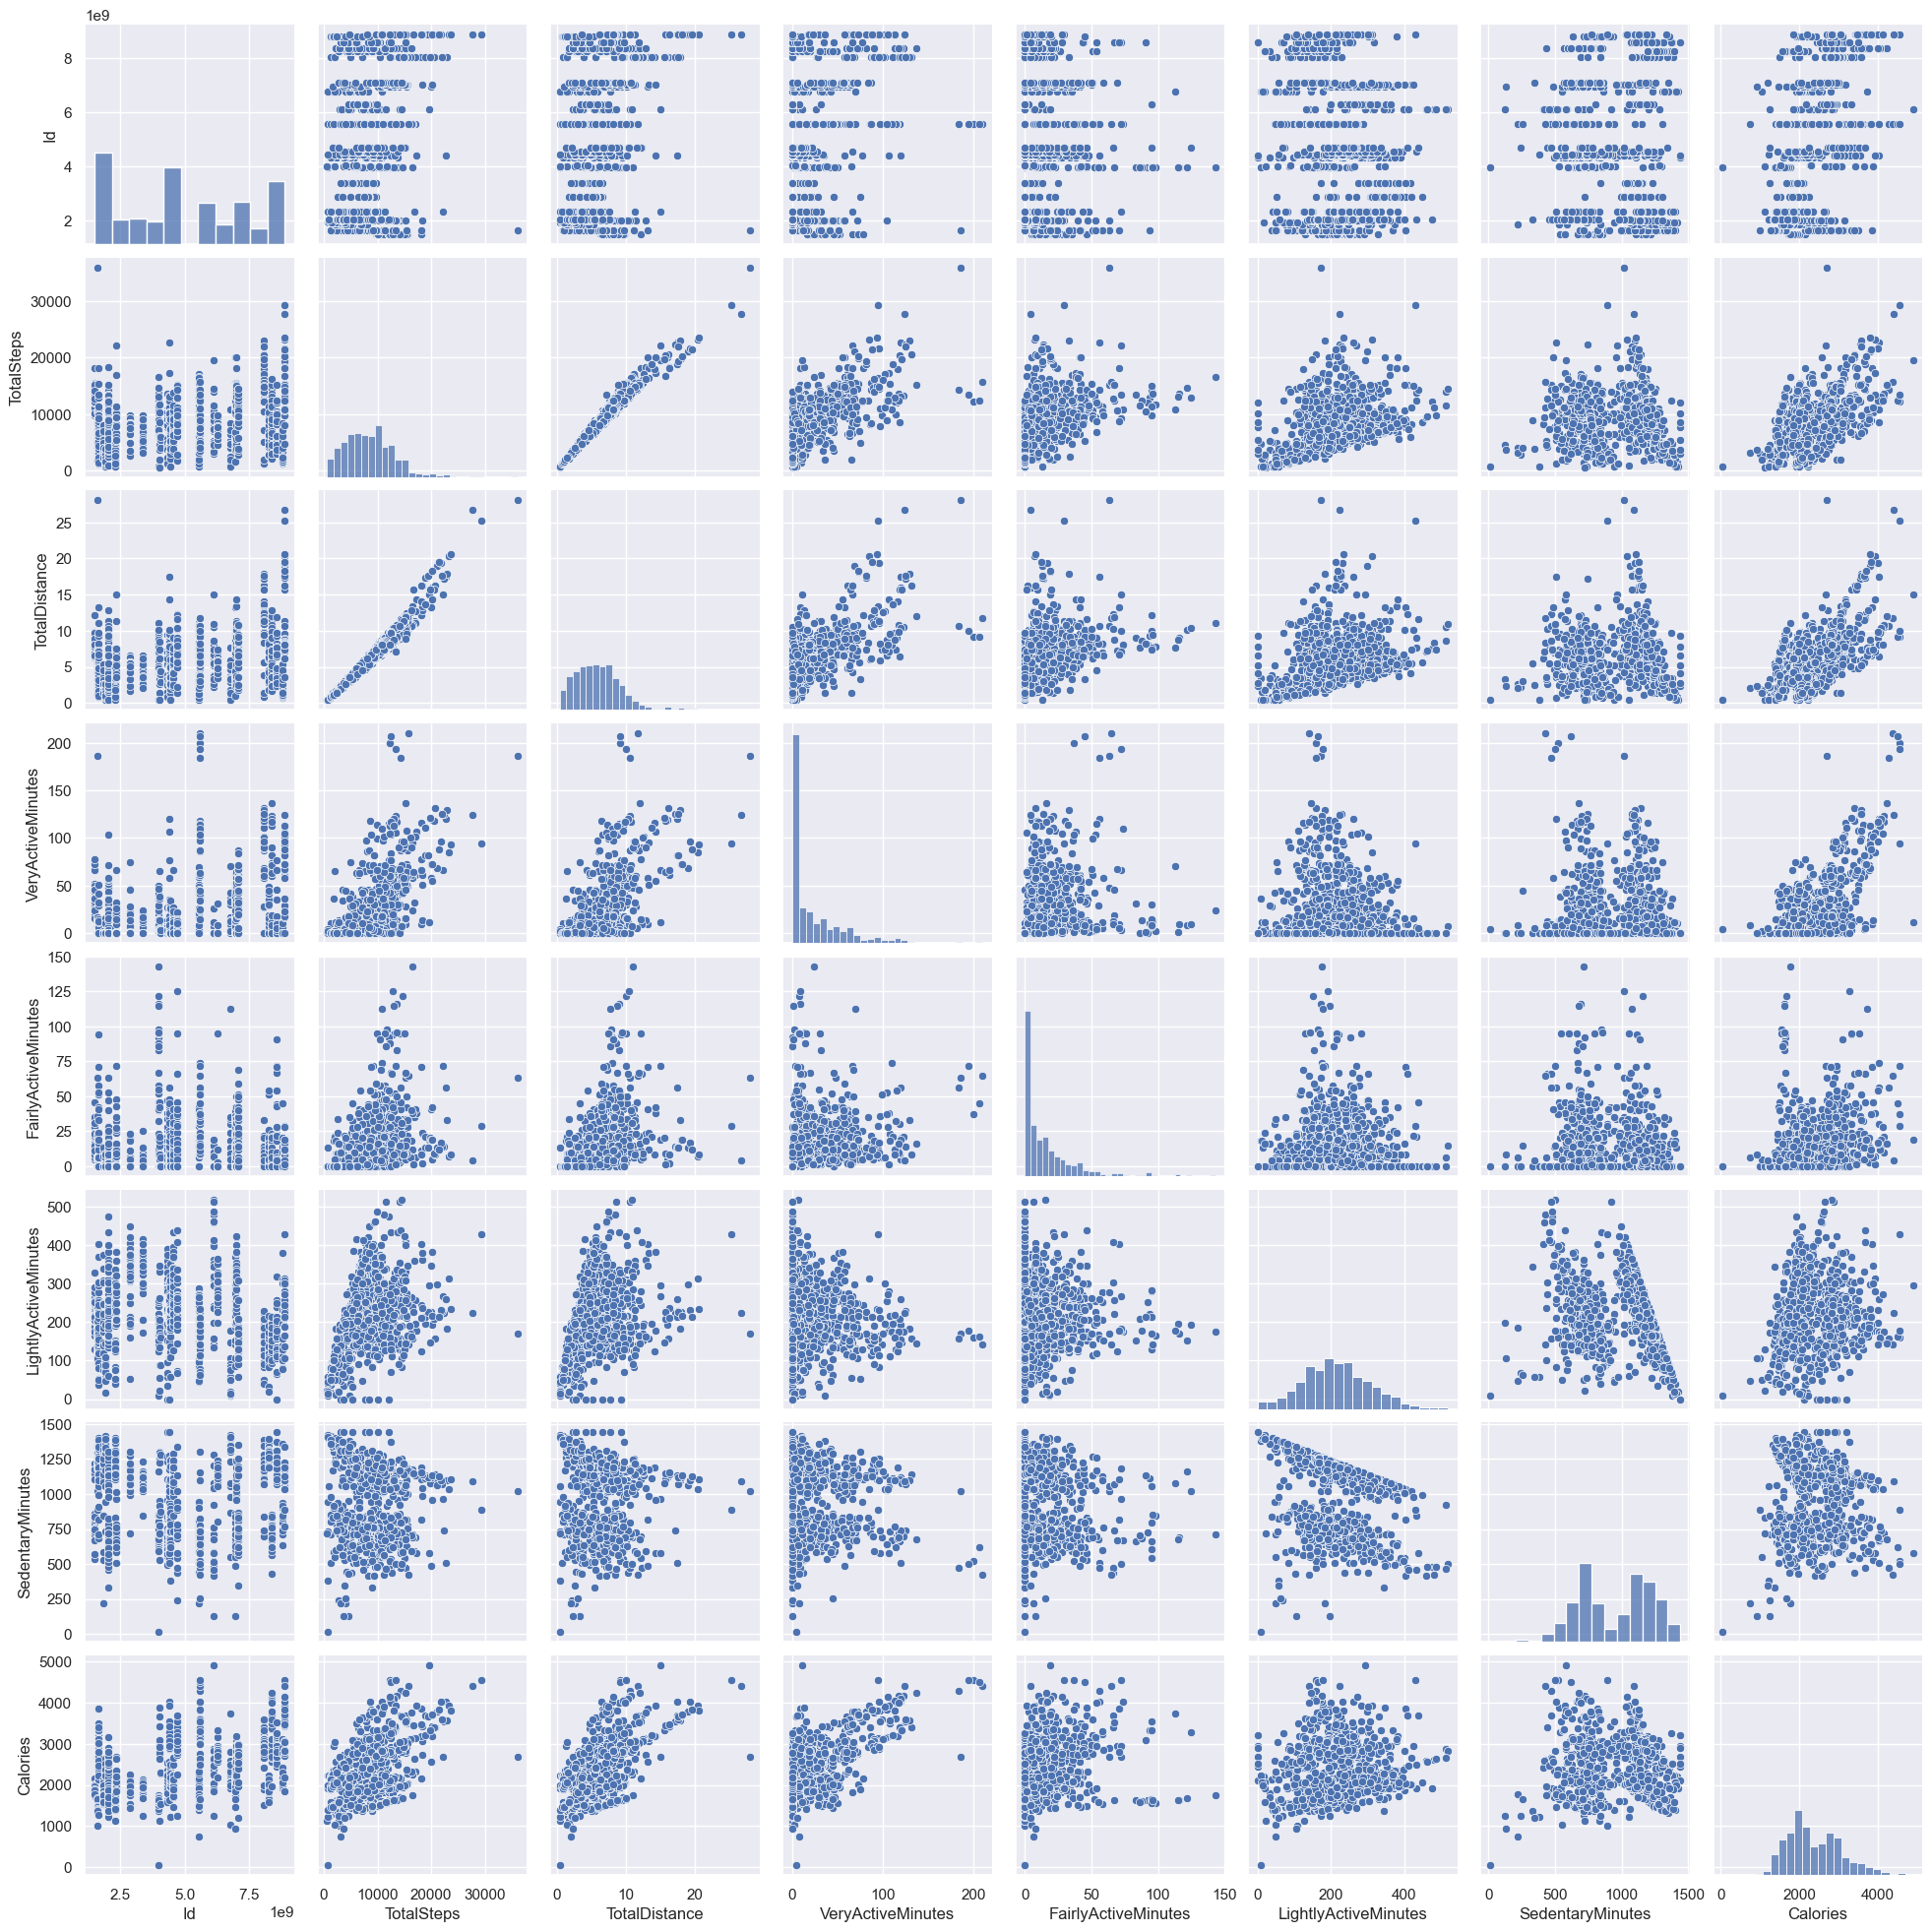

In [39]:
fig = plt.figure()

sns.pairplot(fitbit_flushed_df)

## Looking for correlations/patterns with calories row (bottom)

### - TotalSteps, Total Distance, and VeryActiveMinutes appear to have positive correlation with Calories Burned

### - So let's explore those scatter plots further

### Scatter Plots for totals and flushed data frames:

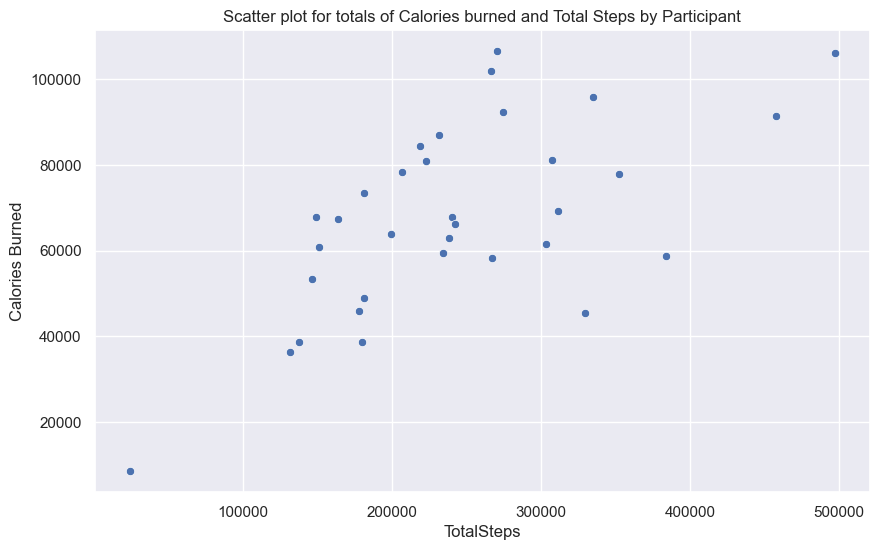

In [40]:
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.scatterplot(data=totals_by_id_sorted, x="TotalSteps", y="Calories")

plt.xlabel("TotalSteps")
plt.ylabel("Calories Burned")
plt.title("Scatter plot for totals of Calories burned and Total Steps by Participant")
plt.show()

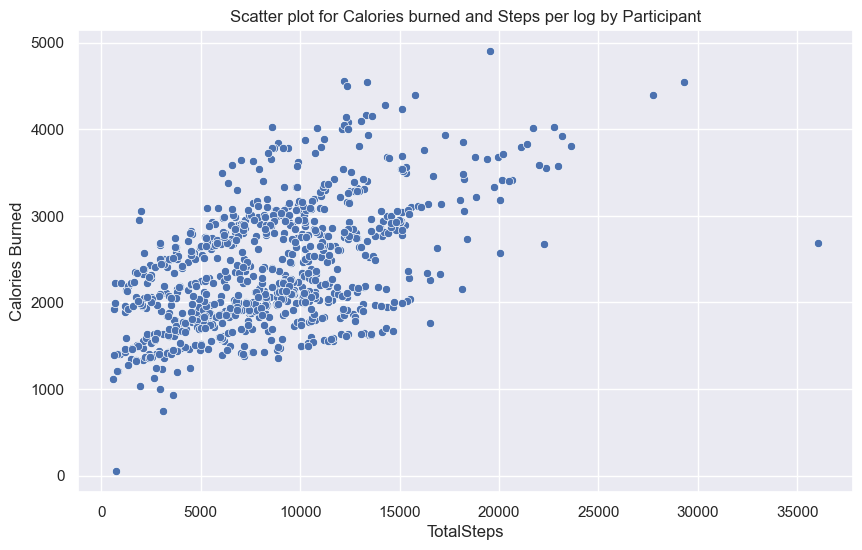

In [41]:
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.scatterplot(data=fitbit_flushed_df, x="TotalSteps", y="Calories")

plt.xlabel("TotalSteps")
plt.ylabel("Calories Burned")
plt.title("Scatter plot for Calories burned and Steps per log by Participant")
plt.show()

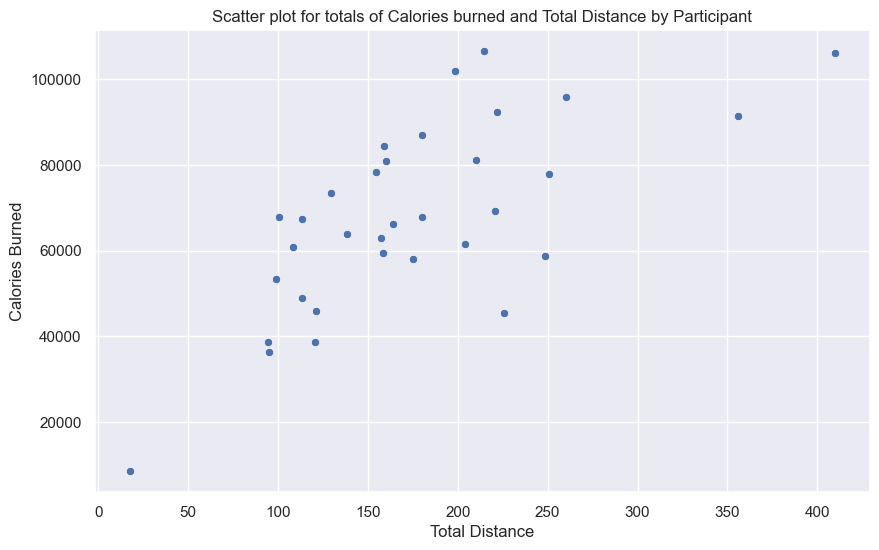

In [42]:
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.scatterplot(data=totals_by_id_sorted, x="TotalDistance", y="Calories")

plt.xlabel("Total Distance")
plt.ylabel("Calories Burned")
plt.title("Scatter plot for totals of Calories burned and Total Distance by Participant")
plt.show()

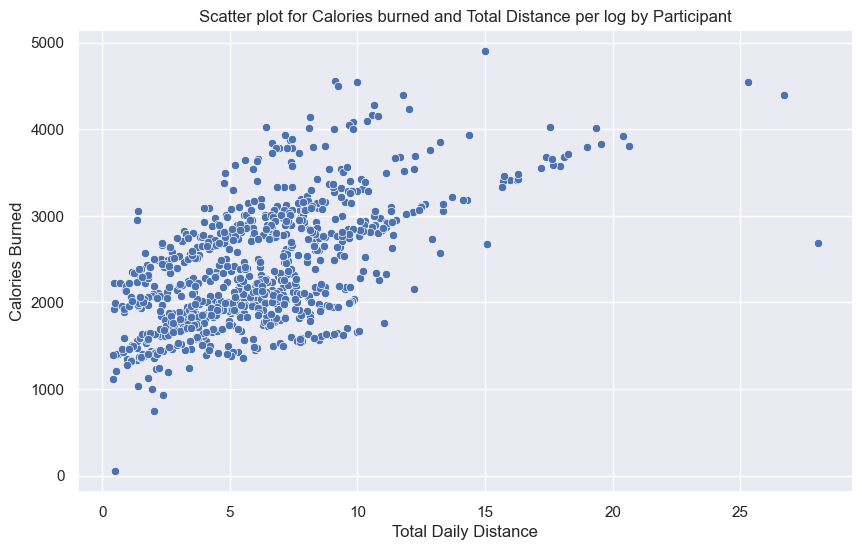

In [43]:
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.scatterplot(data=fitbit_flushed_df, x="TotalDistance", y="Calories")

plt.xlabel("Total Daily Distance")
plt.ylabel("Calories Burned")
plt.title("Scatter plot for Calories burned and Total Distance per log by Participant")
plt.show()

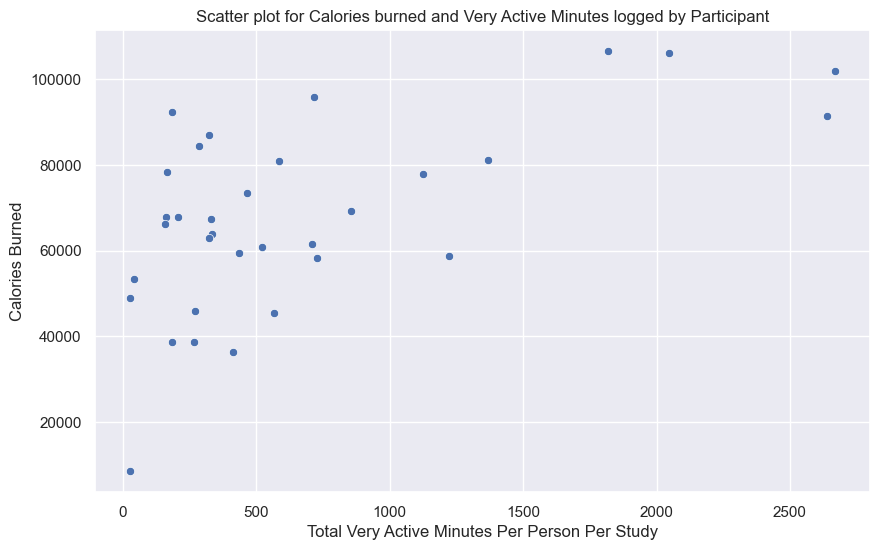

In [44]:
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.scatterplot(data=totals_by_id_sorted, x="VeryActiveMinutes", y="Calories")

plt.xlabel("Total Very Active Minutes Per Person Per Study")
plt.ylabel("Calories Burned")
plt.title("Scatter plot for Calories burned and Very Active Minutes logged by Participant")
plt.show()

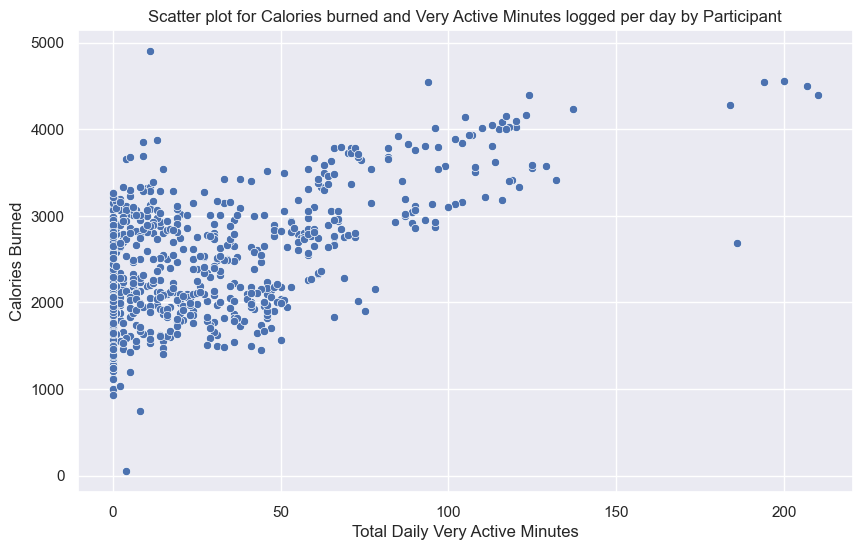

In [45]:
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.scatterplot(data=fitbit_flushed_df, x="VeryActiveMinutes", y="Calories")

plt.xlabel("Total Daily Very Active Minutes")
plt.ylabel("Calories Burned")
plt.title("Scatter plot for Calories burned and Very Active Minutes logged per day by Participant")
plt.show()

### All seem to have similar linear paths so lets look at making a heatmap to compare correlations:

In [46]:
heat_map_chart_flushed_df = fitbit_flushed_df[['TotalSteps', "TotalDistance", "VeryActiveMinutes", "Calories"]]
heat_map_chart_mean_df = fitbit_mean_df[['TotalSteps', "TotalDistance", "VeryActiveMinutes", "Calories"]]

<Axes: title={'center': 'Heatmap of Flushed Data Correlations'}>

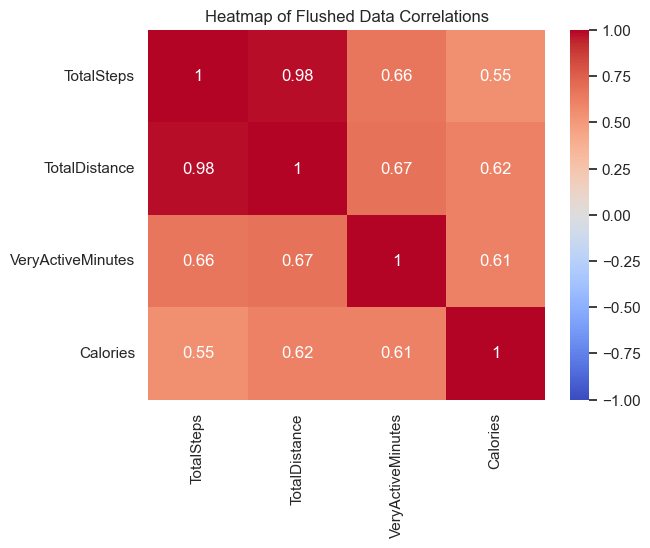

In [47]:
corr_matrix = heat_map_chart_flushed_df.corr()

fig = plt.figure()

plt.title("Heatmap of Flushed Data Correlations")

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

<Axes: title={'center': 'Heatmap of Flushed Data Correlations'}>

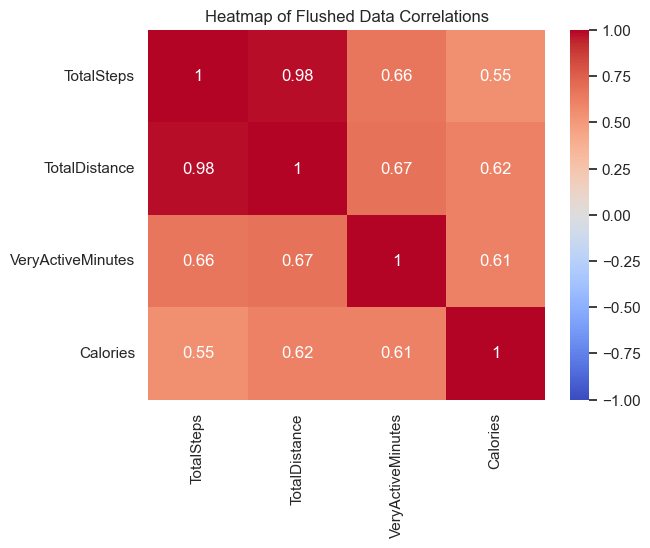

In [48]:
corr_matrix = heat_map_chart_mean_df.corr()

fig = plt.figure()

plt.title("Heatmap of Flushed Data Correlations")

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

### Correlation to Calories Burned Ranking:
 1. TotalDistance -> .62
 2. VeryActiveMinutes -> .61
 3. TotalSteps -> .55

# Step 5: Prep for Data Wrangling and Statistical Analysis

### Data has been cleansed and is mostly ready for statistical analysis/ linear regressions

#### - Because TotalDistance is the highest correlated with Calories burned need to transform data sets from KM to Miles as we are in the US

In [49]:
fitbit_flushed_miles_df = pd.read_csv('fitbit_eda_flushed_df.csv')

In [50]:
fitbit_mean_miles_df = pd.read_csv('fitbit_eda_mean_df.csv')

In [51]:
fitbit_flushed_miles_df["TotalDistance"] = (fitbit_flushed_miles_df["TotalDistance"] * 0.621371).round(2)

In [52]:
fitbit_flushed_miles_df.drop("Unnamed: 0", axis=1, inplace=True)
fitbit_mean_miles_df.drop("Unnamed: 0", axis=1, inplace=True)

In [53]:
fitbit_flushed_df

,Id,ActivityDate,ActivityDay,TotalSteps,TotalDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,Tue,13162,8.500000,25,13,328,728,1985
1,1503960366,4/13/2016,Wed,10735,6.970000,21,19,217,776,1797
2,1503960366,4/14/2016,Thu,10460,6.740000,30,11,181,1218,1776
3,1503960366,4/15/2016,Fri,9762,6.280000,29,34,209,726,1745
4,1503960366,4/16/2016,Sat,12669,8.160000,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...
837,8877689391,5/8/2016,Sun,10686,8.110000,17,4,245,1174,2847
838,8877689391,5/9/2016,Mon,20226,18.250000,73,19,217,1131,3710
839,8877689391,5/10/2016,Tue,10733,8.150000,18,11,224,1187,2832
840,8877689391,5/11/2016,Wed,21420,19.559999,88,12,213,1127,3832


In [54]:
fitbit_flushed_miles_df

,Id,ActivityDate,ActivityDay,TotalSteps,TotalDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,Tue,13162,5.28,25,13,328,728,1985
1,1503960366,4/13/2016,Wed,10735,4.33,21,19,217,776,1797
2,1503960366,4/14/2016,Thu,10460,4.19,30,11,181,1218,1776
3,1503960366,4/15/2016,Fri,9762,3.90,29,34,209,726,1745
4,1503960366,4/16/2016,Sat,12669,5.07,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...
837,8877689391,5/8/2016,Sun,10686,5.04,17,4,245,1174,2847
838,8877689391,5/9/2016,Mon,20226,11.34,73,19,217,1131,3710
839,8877689391,5/10/2016,Tue,10733,5.06,18,11,224,1187,2832
840,8877689391,5/11/2016,Wed,21420,12.15,88,12,213,1127,3832


In [55]:
fitbit_mean_miles_df["TotalDistance"] = (fitbit_mean_miles_df["TotalDistance"] * 0.621371).round(2)

In [56]:
fitbit_mean_df

,Id,ActivityDate,ActivityDay,TotalSteps,TotalDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,Tue,13162.00000,8.500000,25.000000,13.00000,328.000000,728.00000,1985.00000
1,1503960366,4/13/2016,Wed,10735.00000,6.970000,21.000000,19.00000,217.000000,776.00000,1797.00000
2,1503960366,4/14/2016,Thu,10460.00000,6.740000,30.000000,11.00000,181.000000,1218.00000,1776.00000
3,1503960366,4/15/2016,Fri,9762.00000,6.280000,29.000000,34.00000,209.000000,726.00000,1745.00000
4,1503960366,4/16/2016,Sat,12669.00000,8.160000,36.000000,10.00000,221.000000,773.00000,1863.00000
...,...,...,...,...,...,...,...,...,...,...
935,8792009665,5/6/2016,Fri,8523.33848,6.126247,23.585511,15.12114,215.024941,948.63658,2379.74228
936,8792009665,5/7/2016,Sat,8523.33848,6.126247,23.585511,15.12114,215.024941,948.63658,2379.74228
937,8792009665,5/8/2016,Sun,8523.33848,6.126247,23.585511,15.12114,215.024941,948.63658,2379.74228
938,8792009665,5/9/2016,Mon,8523.33848,6.126247,23.585511,15.12114,215.024941,948.63658,2379.74228


In [57]:
fitbit_mean_miles_df

,Id,ActivityDate,ActivityDay,TotalSteps,TotalDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,Tue,13162.00000,5.28,25.000000,13.00000,328.000000,728.00000,1985.00000
1,1503960366,4/13/2016,Wed,10735.00000,4.33,21.000000,19.00000,217.000000,776.00000,1797.00000
2,1503960366,4/14/2016,Thu,10460.00000,4.19,30.000000,11.00000,181.000000,1218.00000,1776.00000
3,1503960366,4/15/2016,Fri,9762.00000,3.90,29.000000,34.00000,209.000000,726.00000,1745.00000
4,1503960366,4/16/2016,Sat,12669.00000,5.07,36.000000,10.00000,221.000000,773.00000,1863.00000
...,...,...,...,...,...,...,...,...,...,...
935,8792009665,5/6/2016,Fri,8523.33848,3.81,23.585511,15.12114,215.024941,948.63658,2379.74228
936,8792009665,5/7/2016,Sat,8523.33848,3.81,23.585511,15.12114,215.024941,948.63658,2379.74228
937,8792009665,5/8/2016,Sun,8523.33848,3.81,23.585511,15.12114,215.024941,948.63658,2379.74228
938,8792009665,5/9/2016,Mon,8523.33848,3.81,23.585511,15.12114,215.024941,948.63658,2379.74228


In [58]:
fitbit_mean_miles_df[['TotalSteps','TotalDistance','VeryActiveMinutes','FairlyActiveMinutes','LightlyActiveMinutes', 'SedentaryMinutes','Calories']] = (fitbit_mean_miles_df[['TotalSteps','TotalDistance','VeryActiveMinutes','FairlyActiveMinutes','LightlyActiveMinutes', 'SedentaryMinutes','Calories']]).round(2)

In [59]:
fitbit_mean_miles_df

,Id,ActivityDate,ActivityDay,TotalSteps,TotalDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,Tue,13162.00,5.28,25.00,13.00,328.00,728.00,1985.00
1,1503960366,4/13/2016,Wed,10735.00,4.33,21.00,19.00,217.00,776.00,1797.00
2,1503960366,4/14/2016,Thu,10460.00,4.19,30.00,11.00,181.00,1218.00,1776.00
3,1503960366,4/15/2016,Fri,9762.00,3.90,29.00,34.00,209.00,726.00,1745.00
4,1503960366,4/16/2016,Sat,12669.00,5.07,36.00,10.00,221.00,773.00,1863.00
...,...,...,...,...,...,...,...,...,...,...
935,8792009665,5/6/2016,Fri,8523.34,3.81,23.59,15.12,215.02,948.64,2379.74
936,8792009665,5/7/2016,Sat,8523.34,3.81,23.59,15.12,215.02,948.64,2379.74
937,8792009665,5/8/2016,Sun,8523.34,3.81,23.59,15.12,215.02,948.64,2379.74
938,8792009665,5/9/2016,Mon,8523.34,3.81,23.59,15.12,215.02,948.64,2379.74


In [60]:
fitbit_mean_miles_df.to_csv('fitbit_mean_miles_df.csv', index=False)

In [61]:
fitbit_flushed_miles_df.to_csv('fitbit_flushed_miles_df.csv', index=False)

In [62]:
fitbit_mean_miles_df["TotalActiveMinutes"] = (fitbit_mean_miles_df["VeryActiveMinutes"] + fitbit_mean_miles_df["FairlyActiveMinutes"] + fitbit_mean_miles_df["LightlyActiveMinutes"])